<a href="https://colab.research.google.com/github/vidhikhatwani/Identifying-Suicidal-Ideation-from-Twitter/blob/main/Suicidal_Ideation_detection_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
import sklearn

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-87mrn7f9
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-87mrn7f9
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=9a78c49810ed94b05fa86b7cc966353056973210391c00611f7256993d57b599
  Stored in directory: /tmp/pip-ephem-wheel-cache-s1o0_ami/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [ ]:
data = pd.read_csv(r'tweets.csv')

In [ ]:
data

,Target,ID,DateTime,Username,Tweet,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,1960186342,Fri May 29 07:33:44 PDT 2009,Madelinedugganx,My GrandMa is making Dinenr with my Mum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,0,1960186409,Fri May 29 07:33:43 PDT 2009,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,0,1960186429,Fri May 29 07:33:44 PDT 2009,Falchion,@ShaDeLa same here say it like from the Termi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19999,0,1960186445,Fri May 29 07:33:44 PDT 2009,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df  = pd.DataFrame(data[[ 'Target','Tweet']])

In [ ]:
df.head()

,Target,Tweet
0,1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,is upset that he can't update his Facebook by ...
2,1,@Kenichan I dived many times for the ball. Man...
3,1,my whole body feels itchy and like its on fire
4,1,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.size

40002

In [ ]:
df.shape

(20001, 2)

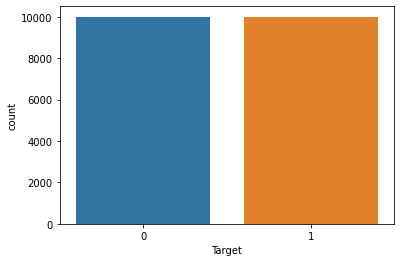

In [ ]:
import seaborn as sns
sns.countplot(x = 'Target', data = data)

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: get_clean(x))

In [ ]:
df.head()

,Target,Tweet
0,1,switchfoot aw that is a bummer you shoulda got...
1,1,is upset that he cannot update his facebook by...
2,1,kenichan i dived many times for the ball manag...
3,1,my whole body feels itchy and like its on fire
4,1,nationwideclass no it is not behaving at all i...


In [ ]:
df.tail()

,Target,Tweet
19996,0,my grandma is making dinenr with my mum
19997,0,midmorning snack time a bowl of cheese noodles...
19998,0,shadela same here say it like from the termini...
19999,0,destinyhope92 im great thaanks wbuu
20000,0,cant wait today i learned her date this weekend


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
tfidf = TfidfVectorizer(max_features=20000,ngram_range=(1,3), analyzer= 'char')

In [ ]:
X = tfidf.fit_transform(df['Tweet'])
y = df['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=0)

RANDOM FOREST:

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [ ]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[1766,  758],
       [ 625, 1852]])

In [ ]:
f1_score(y_test,predictions)

0.7281305287988992

In [ ]:
accuracy_score(y_test,predictions)*100

72.34553089382123

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2524
           1       0.70      0.73      0.71      2477

    accuracy                           0.71      5001
   macro avg       0.71      0.71      0.71      5001
weighted avg       0.71      0.71      0.71      5001



In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i want to kms"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[rfc.predict(X)[0]],np.max(rfc.predict_proba(X))*100))

Prediction: Suicidal
Probability: 72.43%


In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["everything is good"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[rfc.predict(X)[0]],np.max(rfc.predict_proba(X))*100))

Prediction: Non-Suicidal
Probability: 58.00%


SVM:

In [ ]:
clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [ ]:
y_prdct = clf.predict(X_test) 

In [ ]:
print('Accuracy: %.3f' % clf.score(X_test, y_test))

Accuracy: 0.743


In [ ]:
print(classification_report(y_test,y_prdct))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      2524
           1       0.74      0.75      0.74      2477

    accuracy                           0.74      5001
   macro avg       0.74      0.74      0.74      5001
weighted avg       0.74      0.74      0.74      5001



In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["good morning have a nice day"]
X = tfidf.transform(example)
print('Prediction: %s'
      %(label[clf.predict(X)[0]]))

Prediction: Non-Suicidal


In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["I am not okay"]
X = tfidf.transform(example)
print('Prediction: %s'
      %(label[clf.predict(X)[0]]))

Prediction: Suicidal


SGDC:

In [ ]:
clf2 = SGDClassifier(loss='log', random_state=1)

In [ ]:
classes = np.array([0, 1])
clf2.partial_fit(X_train, y_train,classes=classes)

SGDClassifier(loss='log', random_state=1)

In [ ]:
print('Accuracy: %.3f' % clf2.score(X_test, y_test))

Accuracy: 0.738


In [ ]:
y_pred= clf2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.76      2524
           1       0.77      0.67      0.72      2477

    accuracy                           0.74      5001
   macro avg       0.74      0.74      0.74      5001
weighted avg       0.74      0.74      0.74      5001



In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i am happy but depressed"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[clf2.predict(X)[0]],np.max(clf2.predict_proba(X))*100))

Prediction: Suicidal
Probability: 72.78%


MULTINOMIAL NB:

In [ ]:
mnb=MultinomialNB()

In [ ]:
classes = np.array([0, 1])
mnb.partial_fit(X_train, y_train,classes=classes)

MultinomialNB()

In [ ]:
print('Accuracy: %.3f' % mnb.score(X_test, y_test))

Accuracy: 0.723


In [ ]:
y_pred= mnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70      2524
           1       0.69      0.81      0.74      2477

    accuracy                           0.72      5001
   macro avg       0.73      0.72      0.72      5001
weighted avg       0.73      0.72      0.72      5001



In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i am happy but depressed"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[mnb.predict(X)[0]],np.max(mnb.predict_proba(X))*100))

Prediction: Suicidal
Probability: 72.65%


In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i am happy"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[mnb.predict(X)[0]],np.max(mnb.predict_proba(X))*100))

Prediction: Non-Suicidal
Probability: 56.33%


BERNOULLI NB:

In [ ]:
from sklearn.naive_bayes import BernoulliNB
brn = BernoulliNB()

In [ ]:
classes = np.array([0, 1])
brn.partial_fit(X_train, y_train,classes=classes)

BernoulliNB()

In [ ]:
print('Accuracy: %.3f' % brn.score(X_test, y_test))

Accuracy: 0.712


In [ ]:
y_pred= brn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      2524
           1       0.71      0.71      0.71      2477

    accuracy                           0.71      5001
   macro avg       0.71      0.71      0.71      5001
weighted avg       0.71      0.71      0.71      5001



GAUSSIAN NB:

In [ ]:
GNB=GaussianNB()
GNB.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
print('Accuracy: %.3f' % GNB.score(X_test.toarray(), y_test))

Accuracy: 0.554


In [ ]:
y_pred= GNB.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.27      0.38      2524
           1       0.53      0.84      0.65      2477

    accuracy                           0.55      5001
   macro avg       0.58      0.56      0.52      5001
weighted avg       0.58      0.55      0.51      5001



In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i am not okay"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[GNB.predict(X.toarray())[0]],np.max(GNB.predict_proba(X.toarray()))*100))

Prediction: Suicidal
Probability: 100.00%


In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["sun is a star"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[GNB.predict(X.toarray())[0]],np.max(GNB.predict_proba(X.toarray()))*100))

Prediction: Suicidal
Probability: 100.00%


LOGISTIC REG:

In [ ]:
lm=linear_model.LogisticRegression()

In [ ]:
lm.fit(X_train, y_train)


LogisticRegression()

In [ ]:
print('Accuracy: %.3f' % lm.score(X_test, y_test))

Accuracy: 0.747


In [ ]:
y_pred= lm.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2524
           1       0.75      0.74      0.74      2477

    accuracy                           0.75      5001
   macro avg       0.75      0.75      0.75      5001
weighted avg       0.75      0.75      0.75      5001



In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i am happy but depressed"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[lm.predict(X)[0]],np.max(lm.predict_proba(X))*100))

Prediction: Suicidal
Probability: 70.96%


In [ ]:
label = {0:'Non-Suicidal', 1:'Suicidal'}
example = ["i'm fine"]
X = tfidf.transform(example)
print('Prediction: %s\nProbability: %.2f%%'
      %(label[lm.predict(X)[0]],np.max(lm.predict_proba(X))*100))

Prediction: Non-Suicidal
Probability: 61.26%


Result:


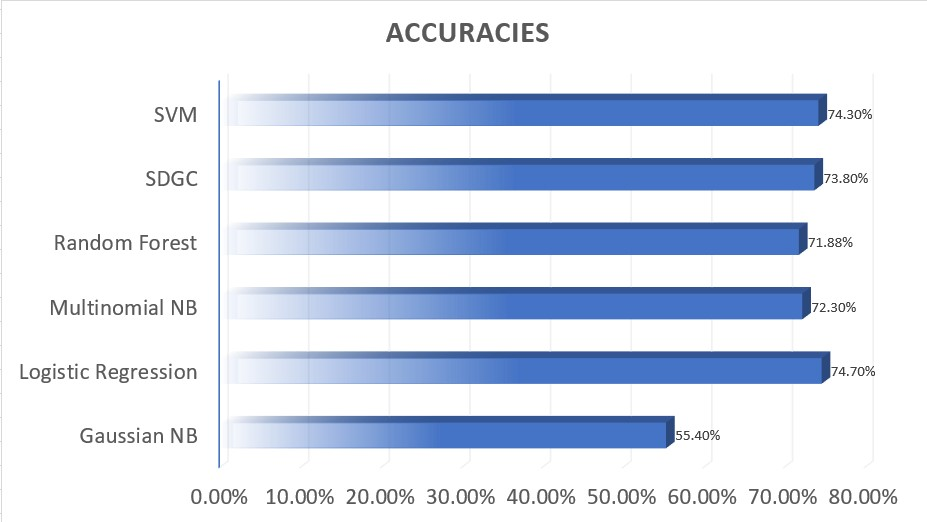